In [1]:
#!pip install wget
#!pip install urllib3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from subprocess import call
from scipy.stats.distributions import gamma,lognorm
import json 
import wget
import os
import os.path
from datetime import datetime
import pytz 
from collections import OrderedDict
#from google.colab import drive
import math

from datetime import datetime,timedelta
from urllib.request import urlopen
import collections
import copy
#os.chdir('/content/gdrive/My Drive')
#drive.mount('/content/gdrive')

In [3]:
if os.path.exists("test.json"):
  os.remove("test.json")
wget.download('https://api.covid19india.org/v4/data-all.json', os.path.join(os.getcwd(),"test.json"))

100% [....................................................] 28268679 / 28268679

'C:\\Users\\asus\\Documents\\GitHub\\CovidToday_Website\\unified\\district_data\\test.json'

In [4]:
def convert(dat): 
    return datetime.strptime(dat, '%Y-%m-%d').strftime('%d %B')

In [5]:
dataset=pd.read_csv('population_districts.csv')
population=pd.DataFrame()
population["District"]=dataset['District']
population["Population"]=dataset['Population']
population = population.set_index('District')
population

,Population
District,
Ahmedabad,7214225
Anantapur,4081148
Aurangabad,3701282
Bengaluru Urban,9621551
Chengalpattu,2556423
Chennai,4646732
Chittoor,4174064
East Godavari,5154296
Faridabad,1809733


In [6]:
d={}
for i in dataset['State_Code'].unique():
    d[i] = [dataset['District'][j] for j in dataset[dataset['State_Code']==i].index]

In [7]:
state_id = d
x=datetime.now(pytz.timezone('Asia/Kolkata')).date()
dd=pd.date_range(start="2020-01-30",end=x)
dates=[]
for i in range(len(dd)):
  dates.append((str(dd[i])[:10]))
#dates
dates1=[]
for w in range (len(dates)):
  if len(dates[w]):
    dates1.append(convert(dates[w]))

In [8]:
{
  "MH":["Mumbai", "Thane", "Pune", "Palghar", "Aurangabad"],
  "TN":["Chennai", "Chengalpattu"],
  "KA":["Bengaluru Urban"],
  "GJ":["Ahmedabad", "Surat"],
  "WB":["Kolkata"],
  "HR":["Gurugram"],
  "TG":["Hyderabad"],
}

{'MH': ['Mumbai', 'Thane', 'Pune', 'Palghar', 'Aurangabad'],
 'TN': ['Chennai', 'Chengalpattu'],
 'KA': ['Bengaluru Urban'],
 'GJ': ['Ahmedabad', 'Surat'],
 'WB': ['Kolkata'],
 'HR': ['Gurugram'],
 'TG': ['Hyderabad']}

In [9]:
'''
from datetime import timedelta
start=datetime.now()
x1=datetime.now(pytz.timezone('Asia/Kolkata')).date()
#x1 = datetime.today()
#y1 = timedelta(days=7)
y1=[]
x1=str(x1)[:10]
for i in range(7,0,-1):
  y1.append(str(datetime.today()-timedelta(days=i))[:10])
#print(y1)
##y1=str(y1)[:10]
t=y1
t
'''
def dates_gen(periods=7):
  t = pd.Series(pd.date_range(end = datetime.now(pytz.timezone('Asia/Kolkata'))-timedelta(1), periods = periods)).dt.strftime('%Y-%m-%d').tolist()

  return t

In [10]:
t = dates_gen()

# Positivity Rate (All metrics)

## From the begining

In [11]:
start=datetime.now()
states={}
csv_dates=[]
csv_states=[]
csv_total_cases=[]
csv_cum_recovered=[]
csv_daily_recovered=[]
csv_cum_deceased=[]
csv_daily_deceased=[]
csv_positivity_rate_cumulative=[]
csv_daily_positive_cases=[]
csv_daily_positivity_rate=[]
csv_daily_positive_cases_ma=[]
csv_daily_positivity_rate_ma=[]
csv_test_per_million=[]
csv_daily_tested=[]
csv_cum_tested=[]

csv_daily_case_per_million = []
csv_daily_test_per_million = []
csv_daily_test_ma = []
csv_daily_deceased_ma = []

test=json.load(open('test.json'))


for j in state_id.keys():
  for k in state_id[j]:   
    test_per_million = ['']*len(dates)
    pos_cum = ['']*len(dates)
    pos_rate_cum = ['']*len(dates)
    daily_pos = ['']*len(dates)
    daily_pos_ma = ['']*len(dates)
    daily_tested = ['']*len(dates)
    daily_pos_rate = ['']*len(dates)
    daily_pos_rate_ma = ['']*len(dates)
    tested_cum = ['']*len(dates)
    tested_daily = ['']*len(dates)
    deceased_cum = ['']*len(dates)
    daily_deceased = ['']*len(dates)
    recovered_cum = ['']*len(dates)
    daily_recovered = ['']*len(dates)


    daily_case_per_million = ['']*len(dates)
    daily_test_per_million = ['']*len(dates)
    daily_test_ma = ['']*len(dates)
    daily_deceased_ma = ['']*len(dates)
    
    for i in range(len(dates)):
      
      if dates[i] in test.keys():
          temp=test[dates[i]] 
          if j in temp.keys():
            
            if 'districts' in temp[j].keys():
          
              if k in temp[j]['districts']:
               
                if 'total' in temp[j]['districts'][k].keys():
                  
                  if 'confirmed' in temp[j]['districts'][k]['total'].keys():
                  
                    pos_cum[i]=temp[j]['districts'][k]['total']['confirmed']

                  if 'tested' in temp[j]['districts'][k]['total'].keys():
                    tested_cum[i]=abs(temp[j]['districts'][k]['total']['tested'])
                    test_per_million[i]=temp[j]['districts'][k]['total']['tested']*1000000/int(population["Population"][k])
                      
                  if 'deceased' in temp[j]['districts'][k]['total'].keys():
                    deceased_cum[i]=temp[j]['districts'][k]['total']['deceased']
                  
                  if 'recovered' in temp[j]['districts'][k]['total'].keys():
                    recovered_cum[i]=temp[j]['districts'][k]['total']['recovered']
                  
                  if len(str(pos_cum[i])) and len(str(tested_cum[i])):
                    pos_rate_cum[i]= pos_cum[i]*100/tested_cum[i]


                if 'delta' in temp[j]['districts'][k].keys():
                  if 'confirmed' in temp[j]['districts'][k]['delta'].keys():
                    daily_pos[i]=temp[j]['districts'][k]['delta']['confirmed']
                    try:
                      daily_case_per_million[i] =temp[j]['delta']['confirmed']*1000000/int(population["Population"][k])   #New
                    except:
                      daily_case_per_million[i]= ''
                  if 'tested' in temp[j]['districts'][k]['delta'].keys():
                    daily_tested[i]=abs(temp[j]['districts'][k]['delta']['tested'])
                    try:
                      daily_test_per_million[i] = temp[j]['delta']['tested']*1000000/int(population["Population"][k])    #New
                    except:
                      daily_test_per_million[i] = ''
                  if 'deceased' in temp[j]['districts'][k]['delta'].keys():
                    daily_deceased[i]=temp[j]['districts'][k]['delta']['deceased']
                  
                  if 'recovered' in temp[j]['districts'][k]['delta'].keys():
                    daily_recovered[i]=temp[j]['districts'][k]['delta']['recovered']
                  
                  if len(str(daily_pos[i])) and len(str(daily_tested[i])):
                    daily_pos_rate[i]=int(daily_pos[i])*100/int(daily_tested[i])

      

    for w in range(7,len(daily_pos)):
                  sum1=0
                  sum2=0
                  for s in range(7):
                    if (len(str(daily_pos[w-s]))!=0 and len(str(daily_tested[w-s]))!=0):
                      sum1+=int(daily_pos[w-s])
                      sum2+=int(daily_tested[w-s])
                  if (sum2!=0):
                    daily_pos_rate_ma[w]=sum1*100/abs(sum2)
                
    for w in range(7,len(daily_pos)):
                  sum1=0
                  count=0
                  for s in range(7):
                    if (len(str(daily_pos[w-s]))!=0):
                      sum1+=int(daily_pos[w-s])
                      count+=1
                  if count!=0:
                    daily_pos_ma[w]=sum1/count

 
    for w in range(7,len(daily_tested)):
      sum1=0
      count=0
      for s in range(7):
        if (len(str(daily_tested[w-s]))!=0):
          sum1+=int(daily_tested[w-s])
        
          count+=1
      if count!=0:
        daily_test_ma[w]=sum1/count
        

    for w in range(7,len(daily_deceased)):
      sum1=0
      count=0
      for s in range(7):
        if (len(str(daily_deceased[w-s]))!=0):
          sum1+=int(daily_deceased[w-s])
          count+=1
      if count!=0:
        daily_deceased_ma[w]=sum1/count



    #print(daily_pos_rate[-15:],k)

    for i in range(len(dates)-1):
                  csv_dates.append(dates1[i])
                  csv_states.append(k)
                  csv_total_cases.append(pos_cum[i])
                  csv_positivity_rate_cumulative.append(pos_rate_cum[i])
                  csv_daily_positive_cases.append(daily_pos[i])
                  csv_cum_recovered.append(recovered_cum[i])
                  csv_daily_recovered.append(daily_recovered[i])
                  csv_cum_deceased.append(deceased_cum[i])
                  csv_daily_deceased.append(daily_deceased[i])
                  csv_daily_positivity_rate.append(daily_pos_rate[i])
                  csv_daily_positive_cases_ma.append(daily_pos_ma[i])
                  csv_daily_positivity_rate_ma.append(daily_pos_rate_ma[i])
                  csv_daily_tested.append(daily_tested[i])
                  csv_cum_tested.append(tested_cum[i])
                  csv_test_per_million.append(test_per_million[i])

                 
                  csv_daily_case_per_million.append(daily_case_per_million[i])
                  csv_daily_test_per_million.append(daily_test_per_million[i])
                  csv_daily_test_ma.append(daily_test_ma[i])
                  csv_daily_deceased_ma.append(daily_deceased_ma[i])
      
    states[k]={
                                  'dates':dates1[:-1],
                                  'cum_positive_cases':pos_cum[:-1],
                                  'cum_positivity_rate':pos_rate_cum[:-1],
                                  'daily_positive_cases':daily_pos[:-1],
                                  'cum_recovered':recovered_cum[:-1],
                                  'daily_recovered':daily_recovered[:-1],
                                  'cum_deceased':deceased_cum[:-1],
                                  'daily_deceased':daily_deceased[:-1],
                                  'daily_positivity_rate':daily_pos_rate[:-1],
                                  'daily_positive_cases_ma': daily_pos_ma[:-1],
                                  'daily_positivity_rate_ma':daily_pos_rate_ma[:-1] , 
                                  'daily_tests': daily_tested[:-1],
                                  'cum_tests': tested_cum[:-1],
                                  'test_per_million':test_per_million[:-1],
                                  'daily_cases_per_million':daily_case_per_million[:-1],
                                  'daily_tests_per_million':daily_test_per_million[:-1],
                                  'daily_tests_ma':daily_test_ma[:-1],
                                  'daily_deceased_ma':daily_deceased_ma[:-1]
                            }
end=datetime.now()
print(end-start)

0:00:01.264074


In [12]:
dates1

['30 January',
 '31 January',
 '01 February',
 '02 February',
 '03 February',
 '04 February',
 '05 February',
 '06 February',
 '07 February',
 '08 February',
 '09 February',
 '10 February',
 '11 February',
 '12 February',
 '13 February',
 '14 February',
 '15 February',
 '16 February',
 '17 February',
 '18 February',
 '19 February',
 '20 February',
 '21 February',
 '22 February',
 '23 February',
 '24 February',
 '25 February',
 '26 February',
 '27 February',
 '28 February',
 '29 February',
 '01 March',
 '02 March',
 '03 March',
 '04 March',
 '05 March',
 '06 March',
 '07 March',
 '08 March',
 '09 March',
 '10 March',
 '11 March',
 '12 March',
 '13 March',
 '14 March',
 '15 March',
 '16 March',
 '17 March',
 '18 March',
 '19 March',
 '20 March',
 '21 March',
 '22 March',
 '23 March',
 '24 March',
 '25 March',
 '26 March',
 '27 March',
 '28 March',
 '29 March',
 '30 March',
 '31 March',
 '01 April',
 '02 April',
 '03 April',
 '04 April',
 '05 April',
 '06 April',
 '07 April',
 '08 April',

## Append Method (Cell converted to markdown)

In [13]:
'''
csv_dates=[]
csv_states=[]
csv_total_cases=[]
csv_cum_recovered=[]
csv_daily_recovered=[]
csv_cum_deceased=[]
csv_daily_deceased=[]
csv_positivity_rate_cumulative=[]
csv_daily_positive_cases=[]
csv_daily_positivity_rate=[]
csv_daily_positive_cases_ma=[]
csv_daily_positivity_rate_ma=[]
csv_test_per_million=[]
csv_daily_tested=[]
csv_cum_tested=[]

#New
csv_daily_case_per_million = []
csv_daily_test_per_million = []
csv_daily_test_ma = []
csv_daily_deceased_ma = []

temp1 = json.load(open('positivity_Rate_dist.json'))

test_json_url = 'https://api.covid19india.org/v3/data-all.json'
test_json = json.loads(urlopen(test_json_url).read())
test= test_json


for x in t:
  temp = test[x]
  
  states={}
  for j in state_id.keys():
    for k in state_id[j]:
    
      test_per_million = temp1[k]['test_per_million']
      pos_cum = temp1[k]['cum_positive_cases']
      pos_rate_cum = temp1[k]['cum_positivity_rate']
      daily_pos = temp1[k]['daily_positive_cases']
      daily_pos_ma = temp1[k]['daily_positive_cases_ma']
      daily_pos_rate = temp1[k]['daily_positivity_rate']
      daily_pos_rate_ma = temp1[k]['daily_positivity_rate_ma']
      tested_cum = temp1[k]['cum_tests']
      daily_tested = temp1[k]['daily_tests']
      deceased_cum = temp1[k]['cum_deceased']
      daily_deceased = temp1[k]['daily_deceased']
      recovered_cum = temp1[k]['cum_recovered']
      daily_recovered = temp1[k]['daily_recovered'] 

      #New added
      daily_case_per_million  = temp1[k]['daily_cases_per_million']
      daily_test_per_million  = temp1[k]['daily_tests_per_million']
      daily_test_ma  = temp1[k]['daily_tests_ma']
      daily_deceased_ma  = temp1[k]['daily_deceased_ma']
      
      dates=temp1[k]['dates']
      if convert(x) not in dates :
        print(1)
        dates.append(convert(x))
        test_per_million.append('')
        pos_cum.append('')
        pos_rate_cum.append('')
        daily_pos.append('')
        daily_pos_ma.append('')
        daily_pos_rate.append('')
        daily_pos_rate_ma.append('')
        tested_cum.append('')
        daily_tested.append('')
        deceased_cum.append('')
        daily_deceased.append('')
        recovered_cum.append('')
        daily_recovered.append('')
        i=len(dates)-1

      for l in range(len(dates)):
        if convert(x)==dates[l]:
          i=l
          break
      
      if dates[i] in test.keys():
          temp=test[dates[i]] #New
          # Previoustemp=json.load(open('test.json'))[dates[i]]
          if j in temp.keys():
            if 'districts' in temp[j].keys():
              if k in temp1.keys():
                  if 'total' in temp[j]['districts'][k].keys():
                    if 'confirmed' in temp[j]['districts'][k]['total'].keys():
                      pos_cum[i]=temp[j]['districts'][k]['total']['confirmed']

                    if 'tested' in temp[j]['districts'][k]['total'].keys():
                      tested_cum[i]=abs(temp[j]['districts'][k]['total']['tested'])
                      test_per_million[i]=temp[j]['districts'][k]['total']['tested']*1000000/int(population["Population"][k])
                        
                    if 'deceased' in temp[j]['districts'][k]['total'].keys():
                      deceased_cum[i]=temp[j]['districts'][k]['total']['deceased']
                    
                    if 'recovered' in temp[j]['districts'][k]['total'].keys():
                      recovered_cum[i]=temp[j]['districts'][k]['total']['recovered']
                    
                    if len(str(pos_cum[i])) and len(str(tested_cum[i])):
                      pos_rate_cum[i]= pos_cum[i]*100/tested_cum[i]

                  if 'delta' in temp[j].keys():
                    if 'confirmed' in temp[j]['districts'][k]['delta'].keys():
                      daily_pos[i]=temp[j]['districts'][k]['delta']['confirmed']
                      try:
                        daily_case_per_million[i] =temp[j]['delta']['confirmed']*1000000/int(population["Population"][k])   #New
                      except:
                        daily_case_per_million[i]= ''

                    if 'tested' in temp[j]['districts'][k]['delta'].keys():
                      daily_tested[i]=abs(temp[j]['districts'][k]['delta']['tested'])
                      try:
                        daily_test_per_million[i] = temp[j]['delta']['tested']*1000000/int(population["Population"][k])    #New
                      except:
                        daily_test_per_million[i] = ''

                    if 'deceased' in temp[j]['districts'][k]['delta'].keys():
                      daily_deceased[i]=temp[j]['districts'][k]['delta']['deceased']
                    
                    if 'recovered' in temp[j]['districts'][k]['delta'].keys():
                      daily_recovered[i]=temp[j]['districts'][k]['delta']['recovered']
                    
                    if len(str(daily_pos[i])) and len(str(daily_tested[i])):
                      daily_pos_rate[i]=int(daily_pos[i])*100/int(daily_tested[i])

      for w in range(7,len(daily_pos)):
        sum1=0
        sum2=0
        for s in range(7):
          if (len(str(daily_pos[w-s]))!=0 and len(str(daily_tested[w-s]))!=0):
            sum1+=int(daily_pos[w-s])
            sum2+=int(daily_tested[w-s])
        if (sum2!=0):
          daily_pos_rate_ma[w]=sum1*100/abs(sum2)
      
      for w in range(7,len(daily_pos)):
        sum1=0
        count=0
        for s in range(7):
          if (len(str(daily_pos[w-s]))!=0):
            sum1+=int(daily_pos[w-s])
            count+=1
        if count!=0:
          daily_pos_ma[w]=sum1/count

      #New
      for w in range(7,len(daily_tested)):
        sum1=0
        count=0
        for s in range(7):
          if (len(str(daily_tested[w-s]))!=0):
            sum1+=int(daily_tested[w-s])
          
            count+=1
        if count!=0:
          daily_test_ma[w]=sum1/count
          
      #New
      for w in range(7,len(daily_deceased)):
        sum1=0
        count=0
        for s in range(7):
          if (len(str(daily_deceased[w-s]))!=0):
            sum1+=int(daily_deceased[w-s])
            count+=1
        if count!=0:
          daily_deceased_ma[w]=sum1/count


      st=k
      for i in range(len(dates)):
          
          csv_dates.append(dates[i])
          csv_states.append(st)
          csv_total_cases.append(pos_cum[i])
          csv_positivity_rate_cumulative.append(pos_rate_cum[i])
          csv_daily_positive_cases.append(daily_pos[i])
          csv_cum_recovered.append(recovered_cum[i])
          csv_daily_recovered.append(daily_recovered[i])
          csv_cum_deceased.append(deceased_cum[i])
          csv_daily_deceased.append(daily_deceased[i])
          csv_daily_positivity_rate.append(daily_pos_rate[i])
          csv_daily_positive_cases_ma.append(daily_pos_ma[i])
          csv_daily_positivity_rate_ma.append(daily_pos_rate_ma[i])
          csv_daily_tested.append(daily_tested[i])
          csv_cum_tested.append(tested_cum[i])
          csv_test_per_million.append(test_per_million[i])
          
          #New
          csv_daily_case_per_million.append(daily_case_per_million[i])
          csv_daily_test_per_million.append(daily_test_per_million[i])
          csv_daily_test_ma.append(daily_test_ma[i])
          csv_daily_deceased_ma.append(daily_deceased_ma[i])
      #print(st)
      
      states[st]={
                      'dates':dates,
                      'cum_positive_cases':pos_cum,
                      'cum_positivity_rate':pos_rate_cum,
                      'daily_positive_cases':daily_pos,
                      'cum_recovered':recovered_cum,
                      'daily_recovered':daily_recovered,
                      'cum_deceased':deceased_cum,
                      'daily_deceased':daily_deceased,
                      'daily_positivity_rate':daily_pos_rate,
                      'daily_positive_cases_ma': daily_pos_ma,
                      'daily_positivity_rate_ma':daily_pos_rate_ma , 
                      'daily_tests': daily_tested,
                      'cum_tests': tested_cum,
                      'test_per_million':test_per_million,   

                      #New
                      'daily_cases_per_million':daily_case_per_million,
                      'daily_tests_per_million':daily_test_per_million,
                      'daily_tests_ma':daily_test_ma,
                      'daily_deceased_ma':daily_deceased_ma 
                }

    

states['datetime']=str(datetime.now(pytz.timezone('Asia/Kolkata')))
with open('positivity_Rate_dist.json', 'w') as outfile:
    json.dump(states, outfile,indent=4)'''

'\ncsv_dates=[]\ncsv_states=[]\ncsv_total_cases=[]\ncsv_cum_recovered=[]\ncsv_daily_recovered=[]\ncsv_cum_deceased=[]\ncsv_daily_deceased=[]\ncsv_positivity_rate_cumulative=[]\ncsv_daily_positive_cases=[]\ncsv_daily_positivity_rate=[]\ncsv_daily_positive_cases_ma=[]\ncsv_daily_positivity_rate_ma=[]\ncsv_test_per_million=[]\ncsv_daily_tested=[]\ncsv_cum_tested=[]\n\n#New\ncsv_daily_case_per_million = []\ncsv_daily_test_per_million = []\ncsv_daily_test_ma = []\ncsv_daily_deceased_ma = []\n\ntemp1 = json.load(open(\'positivity_Rate_dist.json\'))\n\ntest_json_url = \'https://api.covid19india.org/v3/data-all.json\'\ntest_json = json.loads(urlopen(test_json_url).read())\ntest= test_json\n\n\nfor x in t:\n  temp = test[x]\n  \n  states={}\n  for j in state_id.keys():\n    for k in state_id[j]:\n    \n      test_per_million = temp1[k][\'test_per_million\']\n      pos_cum = temp1[k][\'cum_positive_cases\']\n      pos_rate_cum = temp1[k][\'cum_positivity_rate\']\n      daily_pos = temp1[k][\'dai

In [14]:
states['datetime']=str(datetime.now(pytz.timezone('Asia/Kolkata')))
with open('positivity_Rate_dist.json', 'w') as outfile:
    json.dump(states, outfile,indent=4)

In [15]:
n_states=0
for i in state_id.values():
  for k in i:
    n_states+=1

n_dates = len(list(test.keys()))

rows = n_states*n_dates

In [16]:
rows/36

179.0

In [17]:
csv_dates[-1]

'22 August'

In [18]:
df=pd.DataFrame()

df['dates']=csv_dates[:rows]
df['state']=csv_states[:rows]
df['cum_positive_cases']=csv_total_cases[:rows]
df['cum_positivity_rate']=csv_positivity_rate_cumulative[:rows]
df['cum_recovered']=csv_cum_recovered[:rows]
df['daily_recovered']:csv_daily_recovered[:rows]
df['cum_deceased']=csv_cum_deceased[:rows]
df['daily_deceased']:daily_deceased[:rows]
df['daily_positive_cases']=csv_daily_positive_cases[:rows]
df['daily_positivity_rate']=csv_daily_positivity_rate[:rows]
df['daily_positive_cases_ma']=csv_daily_positive_cases_ma[:rows]
df['daily_positivity_rate_ma']=    csv_daily_positivity_rate_ma[:rows]
df['daily_tests']=csv_daily_tested[:rows]
df['cum_tested']=csv_cum_tested[:rows]
df['test_per_million']=csv_test_per_million[:rows]

#New
df['daily_cases_per_million'] = csv_daily_case_per_million[:rows]
df['daily_tests_per_million'] = csv_daily_test_per_million[:rows]
df['daily_tests_ma'] = csv_daily_test_ma[:rows]
df['daily_deceased_ma'] = csv_daily_deceased_ma[:rows]

df.to_csv('positivity_Rate_dist.csv',index=False)

In [19]:
df_to_concat = copy.deepcopy(df)

In [20]:
data_recovered = pd.DataFrame()
districts=[]
data_deceased = pd.DataFrame()
data_confirmed = pd.DataFrame()
for s in state_id.keys():
    st=state_id[s]
    districts+=st
    print(st)
    for k in st:
      data_confirmed[k] = np.array(states[k]['daily_positive_cases'])
      data_deceased[k] = np.array(states[k]['daily_deceased'])
      data_recovered[k] = np.array(states[k]['daily_recovered'])

['Ahmedabad', 'Surat']
['Anantapur', 'Chittoor', 'East Godavari', 'Guntur', 'Kurnool', 'West Godavari']
['Aurangabad', 'Jalgaon', 'Mumbai', 'Nashik', 'Palghar', 'Pune', 'Raigad', 'Solapur', 'Thane']
['Bengaluru Urban']
['Chengalpattu', 'Chennai', 'Kancheepuram', 'Madurai', 'Thiruvallur', 'Tiruvannamalai', 'Vellore']
['Faridabad', 'Gurugram']
['Ganjam']
['Gautam Buddha Nagar', 'Ghaziabad']
['Hyderabad', 'Medchal Malkajgiri', 'Ranga Reddy']
['Kamrup Metropolitan']
['Kolkata', 'North 24 Parganas']


# CFR

In [21]:
def n2z(x):
    x[np.logical_or(np.isnan(x),np.isinf(x))] = 0
    return x

In [22]:
len(dates)

207

In [23]:
data_recovered = data_recovered.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_recovered = data_recovered.astype(np.int32)
data_confirmed = data_confirmed.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_confirmed = data_confirmed.astype(np.int32)
data_deceased = data_deceased.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_deceased = data_deceased.astype(np.int32)
data_deceased['date'] = dates[:-1]
data_recovered['date'] = dates[:-1]
data_confirmed['date'] = dates[:-1]

cfr() -- Working :  Ahmedabad
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Surat


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Anantapur


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Chittoor


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  East Godavari


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Guntur


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Kurnool


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  West Godavari


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Aurangabad


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Jalgaon


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Mumbai


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


cfr() -- Working :  Nashik
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Palghar


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Pune


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Raigad


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Solapur


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Thane


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Bengaluru Urban


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Chengalpattu


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Chennai


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working : 

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


 Kancheepuram
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Madurai


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Thiruvallur


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Tiruvannamalai


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Vellore


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Faridabad


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Gurugram


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Ganjam


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Gautam Buddha Nagar


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Ghaziabad


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Hyderabad


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Medchal Malkajgiri


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Ranga Reddy


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Kamrup Metropolitan


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Kolkata


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  North 24 Parganas


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


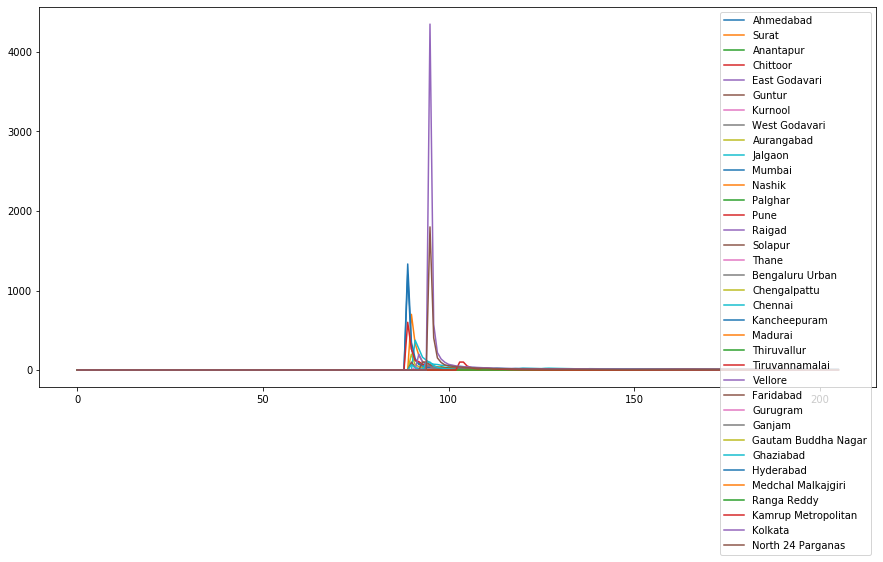

In [24]:
json_data={}
cfr = pd.DataFrame()
final=pd.DataFrame()
plt.figure(1, figsize=(15, 7))
for st in districts:
    print("cfr() -- Working : ",st)
    
    state=st
    boots = 100
    conf = []
    for n in range(boots):
        #print("Iteration: ",n+1,end='\r')
        if n  == boots//4:
          print("Progress : 25%")
        if n  == boots//2:
          print("Progress : 50%")
        if n  == (boots*3)//4:
          print("Progress : 75%")  
        if n  == boots-1:
          print("Progress : 100%")

        dataset = np.copy(data_confirmed[state].values)
        mean = 13.0+(20.9-8.7)/4*np.random.normal()
        sd = 12.7+(26.0-6.4)/4*np.random.normal()
        phi = np.sqrt(sd**2 + mean**2)
        mu = np.log(mean**2/phi)
        sigma = np.sqrt(np.log(phi**2/mean**2))
        L = lognorm(s=sigma,scale=np.exp(mu))
        for i in range(len(dataset)-1,-1,-1):
            send_forward = np.round(L.rvs(np.max([dataset[i],0])))
            send_forward = send_forward[i+send_forward<len(dataset)]
            dataset[i] = 0
            for j in np.unique(np.int32(send_forward)):
                dataset[i+j] += np.sum(send_forward==j)
        conf.append(dataset)
    CFR = np.cumsum(data_deceased[state].values)/np.cumsum(conf,axis=1)
    col_mean = np.nanmean(CFR, axis=0)
    inds = np.where(np.isnan(CFR))
    CFR[inds] = np.take(col_mean, inds[1])
    #temp1=list(pd.Series(dates).dt.strftime('%m-%d-%Y'))
    #print(temp1[0])
    temp={}
    temp = {
        'dates':dates1[:-1],
        'cfr1_point':list(n2z(100*np.cumsum(data_deceased[state].values)/np.cumsum(data_confirmed[state].values))),
        'cfr2_point':list(n2z(100*np.cumsum(data_deceased[state].values)/(np.cumsum(data_deceased[state].values)+np.cumsum(data_recovered[state].values)))),
        'cfr3_point':list(n2z(100*np.median(CFR,axis=0))),
        'cfr3_l95':list(n2z(100*np.quantile(CFR,0.025,axis=0))),
        'cfr3_u95':list(n2z(100*np.quantile(CFR,0.975,axis=0))),
        'cfr3_l50':list(n2z(100*np.quantile(CFR,0.25,axis=0))),
        'cfr3_u50':list(n2z(100*np.quantile(CFR,0.75,axis=0))),
        }
    a=st
    #print(a)
    states[state].update(temp)
    json_data[state] = temp
    cfr_state=pd.DataFrame()
    cfr_state['state']=([str(a)]*(len(dates)))[:-1]   #Reminder this method has to change when append method is implemented
    cfr_state['dates']=dates1[:-1]                     #Remove [1:] when append method
    cfr_state['cfr1_point']=(list(100*n2z(np.cumsum(data_deceased[state].values)/np.cumsum(data_confirmed[state].values))))
    cfr_state['cfr2_point']=(list(100*n2z(np.cumsum(data_deceased[state].values)/(np.cumsum(data_deceased[state].values)+np.cumsum(data_recovered[state].values)))))
    cfr_state['cfr3_point']=(list(100*n2z(np.median(CFR,axis=0))))
    cfr_state['cfr3_l95']=(list(100*n2z(np.quantile(CFR,0.025,axis=0))))
    cfr_state['cfr3_u95']=(list(100*n2z(np.quantile(CFR,0.975,axis=0))))
    cfr_state['cfr3_l50']=(list(100*n2z(np.quantile(CFR,0.25,axis=0))))
    cfr_state['cfr3_u50']=(list(100*n2z(np.quantile(CFR,0.75,axis=0))))
    cfr=pd.concat([cfr, cfr_state])
      
    plt.plot(temp['cfr3_point'],label=state)
plt.legend()

In [25]:
cfr.to_csv('cfr_district.csv',index=False)
from datetime import datetime
json_data['datetime']=str(datetime.now())

In [26]:
json_data_indented = json.dumps(json_data, indent = 4)
with open("cfr_district.json", "w") as outfile: 
    outfile.write(json_data_indented)

In [27]:
def calc_doublingtimes(x):
    vals = []
    for i in range(x.shape[0]):
        for j in range(i+1,x.shape[0]):
            if len(str(x[j])) and len(str(x[i])):
                vals.append(np.log(2)*(j-i)/np.log(int(x[j])/int(x[i])))
    return np.mean(vals),np.mean(vals)-1.96*np.std(vals),np.mean(vals)+1.96*np.std(vals)

In [28]:
start=datetime.now()
x=datetime.now(pytz.timezone('Asia/Kolkata')).date()
dd=pd.date_range(start="2020-01-30",end=x)
dd = dd [:-1]
datess=[]
for i in range(len(dd)):
  datess.append((str(dd[i])[:10]))

In [29]:
stt=states

In [30]:
dates1 = dates[:-1]
json_data={}
test=json.load(open('test.json'))
for j in state_id.keys():
    cumul=['']*len(dates)
    #st=state_id[j]
    for st in state_id[j]:
        #print(st)
        cumul=states[st]['cum_positive_cases']
        cumul_cases=np.array(cumul)
        dbt = np.zeros((3,cumul_cases.shape[0]))
        for i in range(cumul_cases.shape[0]):
            dbt[:,i] = calc_doublingtimes(cumul_cases[i-7:i])
        #st=state_id[j]
        #temp={}
        temp1 = {'dates':dates1,'dbt_point':pd.Series((list(dbt[0,:]))).fillna('').tolist(),'dbt_l95':pd.Series((list(dbt[1,:]))).fillna('').tolist(),'dbt_u95':pd.Series((list(dbt[2,:]))).fillna('').tolist()}
        states[st].update(temp1)
        json_data[st] = temp1

F:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
F:\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
F:\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
F:\Anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
F:\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
F:\Anaconda3\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - ar

In [31]:
json_data_indented = json.dumps(json_data, indent = 4)
with open("doubling_rate_dist.json", "w") as outfile: 
    outfile.write(json_data_indented)

# RT

Working :  Ahmedabad


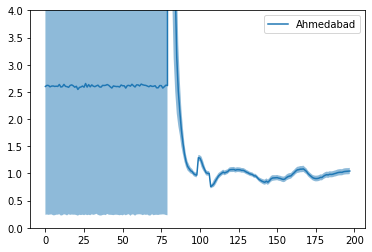

Working :  Surat


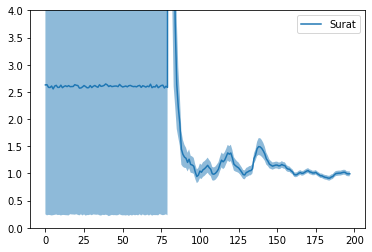

Working :  Anantapur


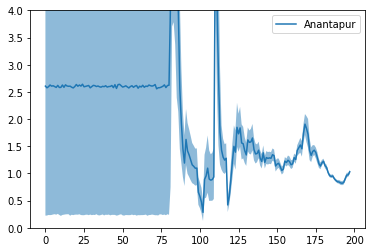

Working :  Chittoor


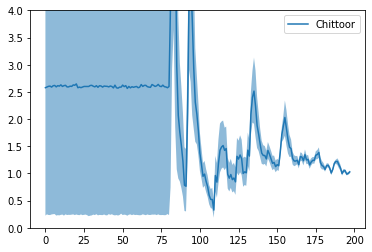

Working :  East Godavari


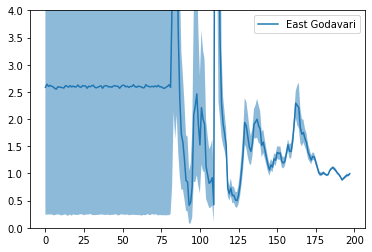

Working :  Guntur


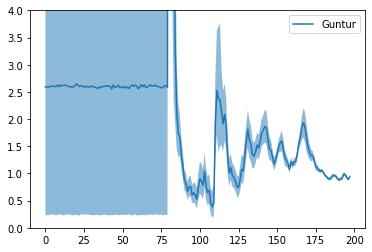

Working :  Kurnool


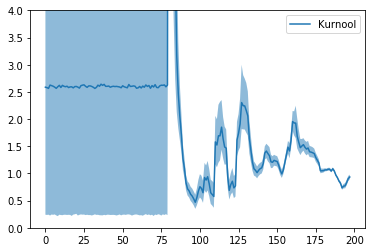

Working :  West Godavari


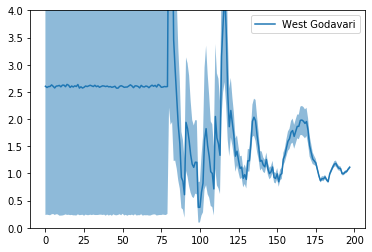

Working :  Aurangabad


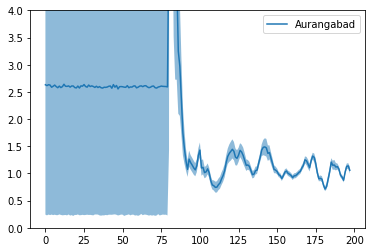

Working :  Jalgaon


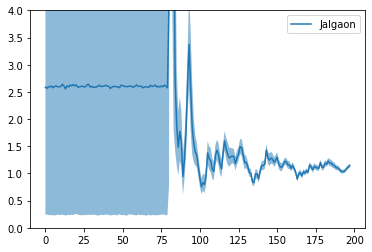

Working :  Mumbai


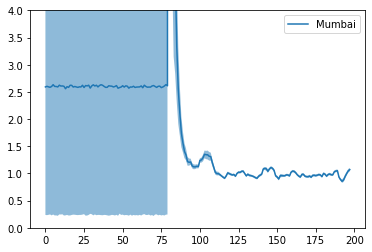

Working :  Nashik


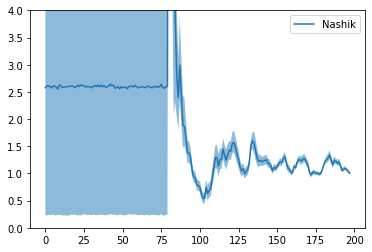

Working :  Palghar


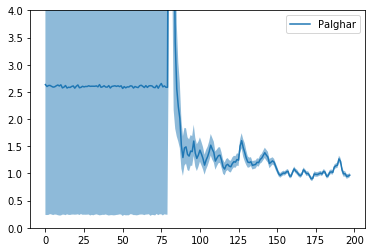

Working :  Pune


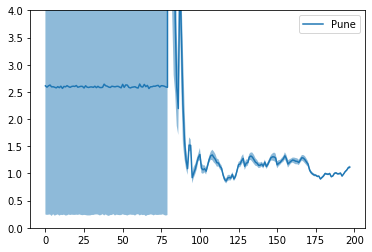

Working :  Raigad


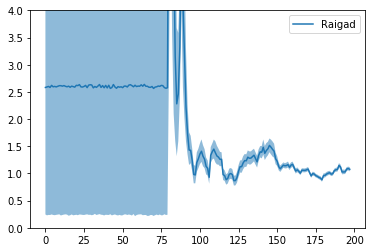

Working :  Solapur


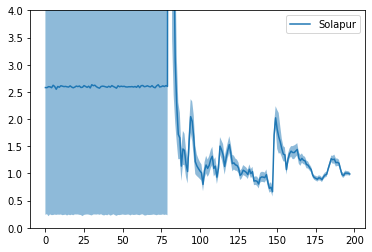

Working :  Thane


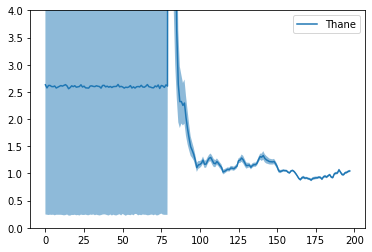

Working :  Bengaluru Urban


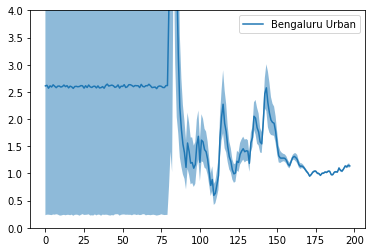

Working :  Chengalpattu


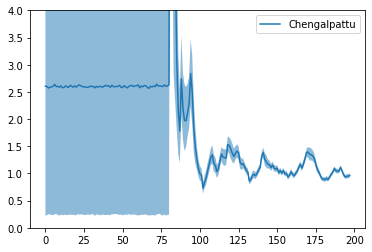

Working :  Chennai


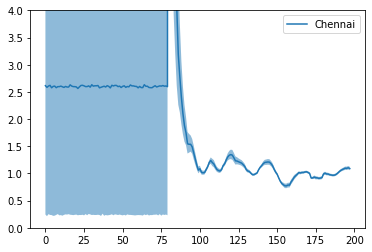

Working :  Kancheepuram


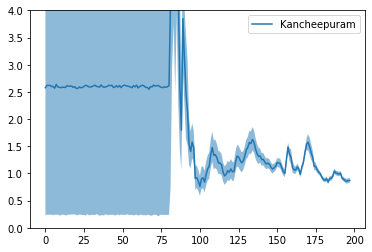

Working :  Madurai


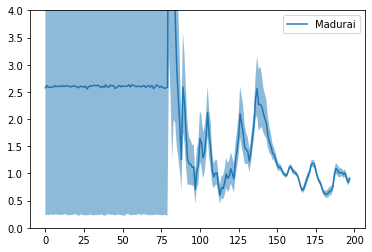

Working :  Thiruvallur


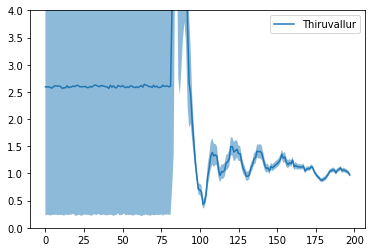

Working :  Tiruvannamalai


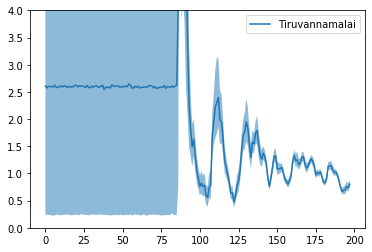

Working :  Vellore


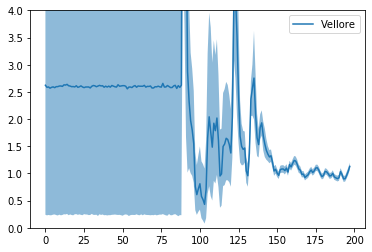

Working :  Faridabad


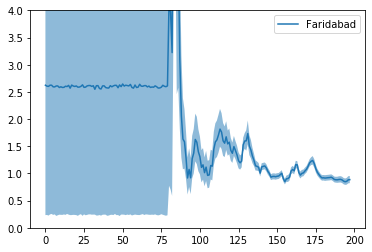

Working :  Gurugram


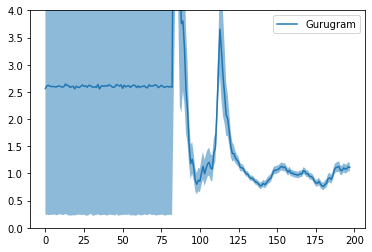

Working :  Ganjam


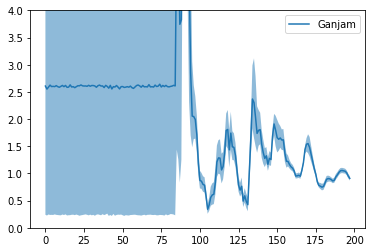

Working :  Gautam Buddha Nagar


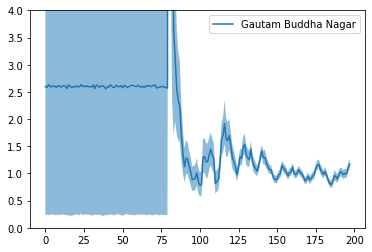

Working :  Ghaziabad


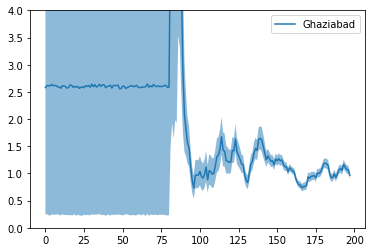

Working :  Hyderabad


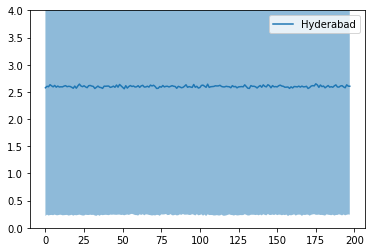

Working :  Medchal Malkajgiri


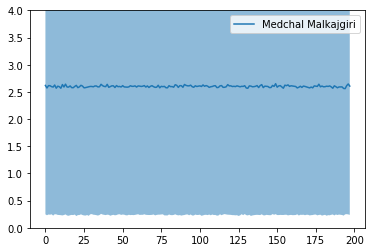

Working :  Ranga Reddy


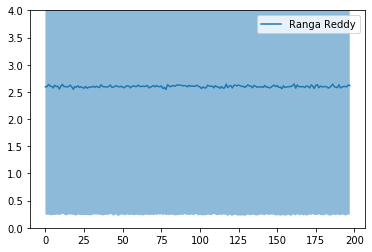

Working :  Kamrup Metropolitan


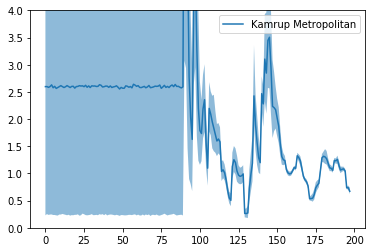

Working :  Kolkata


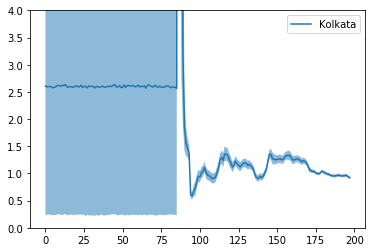

Working :  North 24 Parganas


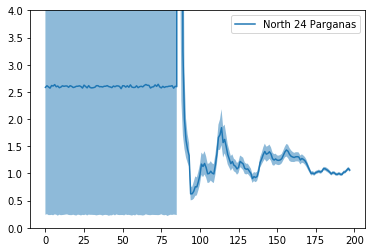

In [32]:
rt_json = {}

rt = pd.DataFrame()
# plt.figure(1, figsize=(15, 7))
for j in state_id.keys():
  for st in state_id[j]:
    state=st
    print("Working : ",state)
    
    temp = pd.DataFrame()
    #temp["active"] = data_confirmed[state]
    temp["active"] = np.array(data_confirmed[state]).clip(0).tolist()

    temp.to_csv('confirmed.csv')
    call(['RScript.exe','scripts/Rt_analysis_newGT_TJ.R'])
    
    values = {
            'rt_point':[],
            'rt_sd':[],
            'rt_l95':[],
            'rt_u95':[],
            'rt_l50':[],
            'rt_u50':[],
            't_end':[]
            }

    for df in [pd.read_csv('rt_temp/'+temp) for temp in os.listdir('rt_temp/')]:
        values['rt_point'].append(df['Mean(R)'])
        values['rt_sd'].append(df['Std(R)'])
        values['rt_l95'].append(df['Quantile.0.025(R)'])
        values['rt_u95'].append(df['Quantile.0.975(R)'])
        values['rt_l50'].append(df['Quantile.0.25(R)'])
        values['rt_u50'].append(df['Quantile.0.75(R)'])
        values['t_end'].append(df['t_end']-1)
    for i in values:
        values[i] = np.median(values[i],axis=0)
    values['dates'] = list(data_confirmed['date'][values['t_end']-1])
    rt_state=pd.DataFrame()
    rt_state['state']=[str(state)]*len(values['dates'])
    rt_state['dates']= values['dates']
    rt_state['rt_point'] = values['rt_point']
    rt_state['rt_sd'] = values['rt_sd']    
    rt_state['rt_l95'] = values['rt_l95']    
    rt_state['rt_u95'] = values['rt_u95']    
    rt_state['rt_l50'] = values['rt_l50']
    rt_state['rt_u50'] = values['rt_u50']
    rt=pd.concat([rt, rt_state])
  
    rt_json[st] = values
    
    plt.plot(range(len(values['rt_point'])),values['rt_point'],label=state)
    plt.fill_between(range(len(values['rt_point'])),values['rt_l95'],values['rt_u95'],alpha=0.5)
    plt.ylim(0,4)
    plt.legend()
    plt.show()

In [33]:
for st in state_id.keys():
    dist = state_id[st]
    for district in dist:
        states[district].update(rt_json[district])

In [34]:
rt.to_csv('rt.csv',index=False)

## Rt shifting

In [35]:
def shift_rt_metrics(dict,key,days):
  values_shifted = collections.deque(dict[key])
  values_shifted.rotate(-1*days)

  new_val = list(values_shifted)

  size = len(dict['dates'])
  
  for i in range(days):
    new_val[size-1-i]=''

  return new_val
 

In [36]:
rt_json_shifted = copy.deepcopy(rt_json)
days = 2
for sta in state_id.keys():
    for st in state_id[sta]:
        rt_json_shifted[st]['rt_point'] = shift_rt_metrics(rt_json[st],'rt_point',days)
        rt_json_shifted[st]['rt_sd'] = shift_rt_metrics(rt_json[st],'rt_sd',days)
        rt_json_shifted[st]['rt_l95'] = shift_rt_metrics(rt_json[st],'rt_l95',days)
        rt_json_shifted[st]['rt_u95'] = shift_rt_metrics(rt_json[st],'rt_u95',days)
        rt_json_shifted[st]['rt_l50'] = shift_rt_metrics(rt_json[st],'rt_l50',days)
        rt_json_shifted[st]['rt_u50'] = shift_rt_metrics(rt_json[st],'rt_u50',days)
        rt_json_shifted[st]['t_end'] = shift_rt_metrics(rt_json[st],'t_end',days) 


In [37]:
for st in state_id.keys():
    dist = state_id[st]
    leng = len(dates[:-1])
    
    #states[state]['dates'] =  temp1['India']['dates']
    for state in dist:
        for keys in list(rt_json_shifted[state].keys())[:-1]:
            if len(rt_json_shifted[state][keys])<leng:
                rt_json_shifted[state][keys].extend(['' for i in range(leng-len(rt_json_shifted[state][keys]))]) 
                
        rt_json_shifted[state]['dates'] = dates[:-1]

In [38]:
states_shifted = copy.deepcopy(states)

for sta in state_id.keys():
    for st in state_id[sta]:
        states_shifted[st].update(rt_json_shifted[st])

In [39]:
for sta in state_id.keys():
    for state in state_id[sta]:
        for key in rt_json[state].keys():
          try:
            rt_json[state][key]=rt_json[state][key].tolist()
          except:
            pass

In [40]:
for sta in state_id.keys():
    for state in state_id[sta]:
        for key in states[state].keys():
          try:
            states[state][key]=states[state][key].tolist()
          except:
            pass

In [41]:
for st in state_id.keys():
    dist = state_id[st]
        
    leng = len(dates[:-1])

        #states[state]['dates'] =  temp1['India']['dates']
    for state in dist:
        for keys in list(states[state].keys())[1:]:
            if len(states[state][keys])<leng:
                states[state][keys].extend(['' for i in range(leng-len(states[state][keys]))]) 

In [42]:
for st in state_id.keys():
    dist = state_id[st]
    leng = len(dates[:-1])
    
    #states[state]['dates'] =  temp1['India']['dates']
    for state in dist:
         for keys in list(states_shifted[state].keys())[1:]:
            if len(states_shifted[state][keys])<leng:
                states_shifted[state][keys].extend(['' for i in range(leng-len(states_shifted[state][keys]))]) 

In [43]:
for sta in state_id.keys():
    for st in state_id[sta]:
        states[st]['dates'] = dates[:-1]
        states_shifted[st]['dates'] = dates[:-1]

## Rt changes for review

In [44]:
with open('rt_shifted.json', 'w') as outfile:
  json.dump(rt_json_shifted, outfile,indent=4)

In [45]:
with open('rt.json', 'w') as outfile:
  json.dump(rt_json, outfile,indent=4)

In [46]:
'''
df_list = [df,cfr,rt]
all_dataframes = pd.concat(df_list)
all_dataframes.to_csv('complete_districts_all_metrics.csv',index=False)'''

"\ndf_list = [df,cfr,rt]\nall_dataframes = pd.concat(df_list)\nall_dataframes.to_csv('complete_districts_all_metrics.csv',index=False)"

In [47]:
len(dates)

207

In [48]:
rt_graph = copy.deepcopy(rt_json_shifted)

de =10

for s in state_id.keys():
    for st in state_id[s]:
        for k in rt_json_shifted[st].keys():
            rt_graph[st][k] = rt_json_shifted[st][k][:-10]

In [49]:
with open('rt_graph.json', 'w') as outfile:
  json.dump(rt_graph, outfile,indent=4)

# Complete

In [50]:
cols=list(states['Mumbai'].keys())
q=['state']
complete=pd.DataFrame(columns=q+cols)
keys=list(states.keys())[:-1]
for i in keys:
  temp=pd.DataFrame()
  d=len(states['Mumbai']['dates'])

  temp['state']=[str(i)]*d
  
  for j in cols:
    print(i,j)
    temp[j]=list(states[i][j])[:d]
  complete = pd.concat([complete,temp])

Ahmedabad dates
Ahmedabad cum_positive_cases
Ahmedabad cum_positivity_rate
Ahmedabad daily_positive_cases
Ahmedabad cum_recovered
Ahmedabad daily_recovered
Ahmedabad cum_deceased
Ahmedabad daily_deceased
Ahmedabad daily_positivity_rate
Ahmedabad daily_positive_cases_ma
Ahmedabad daily_positivity_rate_ma
Ahmedabad daily_tests
Ahmedabad cum_tests
Ahmedabad test_per_million
Ahmedabad daily_cases_per_million
Ahmedabad daily_tests_per_million
Ahmedabad daily_tests_ma
Ahmedabad daily_deceased_ma
Ahmedabad cfr1_point
Ahmedabad cfr2_point
Ahmedabad cfr3_point
Ahmedabad cfr3_l95
Ahmedabad cfr3_u95
Ahmedabad cfr3_l50
Ahmedabad cfr3_u50
Ahmedabad dbt_point
Ahmedabad dbt_l95
Ahmedabad dbt_u95
Ahmedabad rt_point
Ahmedabad rt_sd
Ahmedabad rt_l95
Ahmedabad rt_u95
Ahmedabad rt_l50
Ahmedabad rt_u50
Ahmedabad t_end
Surat dates
Surat cum_positive_cases
Surat cum_positivity_rate
Surat daily_positive_cases
Surat cum_recovered
Surat daily_recovered
Surat cum_deceased
Surat daily_deceased
Surat daily_positiv

Mumbai daily_cases_per_million
Mumbai daily_tests_per_million
Mumbai daily_tests_ma
Mumbai daily_deceased_ma
Mumbai cfr1_point
Mumbai cfr2_point
Mumbai cfr3_point
Mumbai cfr3_l95
Mumbai cfr3_u95
Mumbai cfr3_l50
Mumbai cfr3_u50
Mumbai dbt_point
Mumbai dbt_l95
Mumbai dbt_u95
Mumbai rt_point
Mumbai rt_sd
Mumbai rt_l95
Mumbai rt_u95
Mumbai rt_l50
Mumbai rt_u50
Mumbai t_end
Nashik dates
Nashik cum_positive_cases
Nashik cum_positivity_rate
Nashik daily_positive_cases
Nashik cum_recovered
Nashik daily_recovered
Nashik cum_deceased
Nashik daily_deceased
Nashik daily_positivity_rate
Nashik daily_positive_cases_ma
Nashik daily_positivity_rate_ma
Nashik daily_tests
Nashik cum_tests
Nashik test_per_million
Nashik daily_cases_per_million
Nashik daily_tests_per_million
Nashik daily_tests_ma
Nashik daily_deceased_ma
Nashik cfr1_point
Nashik cfr2_point
Nashik cfr3_point
Nashik cfr3_l95
Nashik cfr3_u95
Nashik cfr3_l50
Nashik cfr3_u50
Nashik dbt_point
Nashik dbt_l95
Nashik dbt_u95
Nashik rt_point
Nashik

Thiruvallur t_end
Tiruvannamalai dates
Tiruvannamalai cum_positive_cases
Tiruvannamalai cum_positivity_rate
Tiruvannamalai daily_positive_cases
Tiruvannamalai cum_recovered
Tiruvannamalai daily_recovered
Tiruvannamalai cum_deceased
Tiruvannamalai daily_deceased
Tiruvannamalai daily_positivity_rate
Tiruvannamalai daily_positive_cases_ma
Tiruvannamalai daily_positivity_rate_ma
Tiruvannamalai daily_tests
Tiruvannamalai cum_tests
Tiruvannamalai test_per_million
Tiruvannamalai daily_cases_per_million
Tiruvannamalai daily_tests_per_million
Tiruvannamalai daily_tests_ma
Tiruvannamalai daily_deceased_ma
Tiruvannamalai cfr1_point
Tiruvannamalai cfr2_point
Tiruvannamalai cfr3_point
Tiruvannamalai cfr3_l95
Tiruvannamalai cfr3_u95
Tiruvannamalai cfr3_l50
Tiruvannamalai cfr3_u50
Tiruvannamalai dbt_point
Tiruvannamalai dbt_l95
Tiruvannamalai dbt_u95
Tiruvannamalai rt_point
Tiruvannamalai rt_sd
Tiruvannamalai rt_l95
Tiruvannamalai rt_u95
Tiruvannamalai rt_l50
Tiruvannamalai rt_u50
Tiruvannamalai t_en

North 24 Parganas daily_recovered
North 24 Parganas cum_deceased
North 24 Parganas daily_deceased
North 24 Parganas daily_positivity_rate
North 24 Parganas daily_positive_cases_ma
North 24 Parganas daily_positivity_rate_ma
North 24 Parganas daily_tests
North 24 Parganas cum_tests
North 24 Parganas test_per_million
North 24 Parganas daily_cases_per_million
North 24 Parganas daily_tests_per_million
North 24 Parganas daily_tests_ma
North 24 Parganas daily_deceased_ma
North 24 Parganas cfr1_point
North 24 Parganas cfr2_point
North 24 Parganas cfr3_point
North 24 Parganas cfr3_l95
North 24 Parganas cfr3_u95
North 24 Parganas cfr3_l50
North 24 Parganas cfr3_u50
North 24 Parganas dbt_point
North 24 Parganas dbt_l95
North 24 Parganas dbt_u95
North 24 Parganas rt_point
North 24 Parganas rt_sd
North 24 Parganas rt_l95
North 24 Parganas rt_u95
North 24 Parganas rt_l50
North 24 Parganas rt_u50
North 24 Parganas t_end


In [51]:
cols=list(states_shifted['Mumbai'].keys())
q=['state']

complete_shifted=pd.DataFrame(columns=q+cols)

keys=list(states_shifted.keys())[:-1]

for i in keys:
  temp=pd.DataFrame()
  d=len(states_shifted['Mumbai']['dates'])
  temp['state']=[str(i)]*d
  
  for j in cols:
    print(i,j)
    temp[j]=list(states_shifted[i][j])
  
  complete_shifted = pd.concat([complete_shifted,temp])

Ahmedabad dates
Ahmedabad cum_positive_cases
Ahmedabad cum_positivity_rate
Ahmedabad daily_positive_cases
Ahmedabad cum_recovered
Ahmedabad daily_recovered
Ahmedabad cum_deceased
Ahmedabad daily_deceased
Ahmedabad daily_positivity_rate
Ahmedabad daily_positive_cases_ma
Ahmedabad daily_positivity_rate_ma
Ahmedabad daily_tests
Ahmedabad cum_tests
Ahmedabad test_per_million
Ahmedabad daily_cases_per_million
Ahmedabad daily_tests_per_million
Ahmedabad daily_tests_ma
Ahmedabad daily_deceased_ma
Ahmedabad cfr1_point
Ahmedabad cfr2_point
Ahmedabad cfr3_point
Ahmedabad cfr3_l95
Ahmedabad cfr3_u95
Ahmedabad cfr3_l50
Ahmedabad cfr3_u50
Ahmedabad dbt_point
Ahmedabad dbt_l95
Ahmedabad dbt_u95
Ahmedabad rt_point
Ahmedabad rt_sd
Ahmedabad rt_l95
Ahmedabad rt_u95
Ahmedabad rt_l50
Ahmedabad rt_u50
Ahmedabad t_end
Surat dates
Surat cum_positive_cases
Surat cum_positivity_rate
Surat daily_positive_cases
Surat cum_recovered
Surat daily_recovered
Surat cum_deceased
Surat daily_deceased
Surat daily_positiv

Palghar dates
Palghar cum_positive_cases
Palghar cum_positivity_rate
Palghar daily_positive_cases
Palghar cum_recovered
Palghar daily_recovered
Palghar cum_deceased
Palghar daily_deceased
Palghar daily_positivity_rate
Palghar daily_positive_cases_ma
Palghar daily_positivity_rate_ma
Palghar daily_tests
Palghar cum_tests
Palghar test_per_million
Palghar daily_cases_per_million
Palghar daily_tests_per_million
Palghar daily_tests_ma
Palghar daily_deceased_ma
Palghar cfr1_point
Palghar cfr2_point
Palghar cfr3_point
Palghar cfr3_l95
Palghar cfr3_u95
Palghar cfr3_l50
Palghar cfr3_u50
Palghar dbt_point
Palghar dbt_l95
Palghar dbt_u95
Palghar rt_point
Palghar rt_sd
Palghar rt_l95
Palghar rt_u95
Palghar rt_l50
Palghar rt_u50
Palghar t_end
Pune dates
Pune cum_positive_cases
Pune cum_positivity_rate
Pune daily_positive_cases
Pune cum_recovered
Pune daily_recovered
Pune cum_deceased
Pune daily_deceased
Pune daily_positivity_rate
Pune daily_positive_cases_ma
Pune daily_positivity_rate_ma
Pune daily_

Vellore t_end
Faridabad dates
Faridabad cum_positive_cases
Faridabad cum_positivity_rate
Faridabad daily_positive_cases
Faridabad cum_recovered
Faridabad daily_recovered
Faridabad cum_deceased
Faridabad daily_deceased
Faridabad daily_positivity_rate
Faridabad daily_positive_cases_ma
Faridabad daily_positivity_rate_ma
Faridabad daily_tests
Faridabad cum_tests
Faridabad test_per_million
Faridabad daily_cases_per_million
Faridabad daily_tests_per_million
Faridabad daily_tests_ma
Faridabad daily_deceased_ma
Faridabad cfr1_point
Faridabad cfr2_point
Faridabad cfr3_point
Faridabad cfr3_l95
Faridabad cfr3_u95
Faridabad cfr3_l50
Faridabad cfr3_u50
Faridabad dbt_point
Faridabad dbt_l95
Faridabad dbt_u95
Faridabad rt_point
Faridabad rt_sd
Faridabad rt_l95
Faridabad rt_u95
Faridabad rt_l50
Faridabad rt_u50
Faridabad t_end
Gurugram dates
Gurugram cum_positive_cases
Gurugram cum_positivity_rate
Gurugram daily_positive_cases
Gurugram cum_recovered
Gurugram daily_recovered
Gurugram cum_deceased
Gurug

Kolkata dates
Kolkata cum_positive_cases
Kolkata cum_positivity_rate
Kolkata daily_positive_cases
Kolkata cum_recovered
Kolkata daily_recovered
Kolkata cum_deceased
Kolkata daily_deceased
Kolkata daily_positivity_rate
Kolkata daily_positive_cases_ma
Kolkata daily_positivity_rate_ma
Kolkata daily_tests
Kolkata cum_tests
Kolkata test_per_million
Kolkata daily_cases_per_million
Kolkata daily_tests_per_million
Kolkata daily_tests_ma
Kolkata daily_deceased_ma
Kolkata cfr1_point
Kolkata cfr2_point
Kolkata cfr3_point
Kolkata cfr3_l95
Kolkata cfr3_u95
Kolkata cfr3_l50
Kolkata cfr3_u50
Kolkata dbt_point
Kolkata dbt_l95
Kolkata dbt_u95
Kolkata rt_point
Kolkata rt_sd
Kolkata rt_l95
Kolkata rt_u95
Kolkata rt_l50
Kolkata rt_u50
Kolkata t_end
North 24 Parganas dates
North 24 Parganas cum_positive_cases
North 24 Parganas cum_positivity_rate
North 24 Parganas daily_positive_cases
North 24 Parganas cum_recovered
North 24 Parganas daily_recovered
North 24 Parganas cum_deceased
North 24 Parganas daily_de

In [52]:
complete[complete['state']=='Ahmedabad']

,state,dates,cum_positive_cases,cum_positivity_rate,daily_positive_cases,cum_recovered,daily_recovered,cum_deceased,daily_deceased,daily_positivity_rate,...,dbt_point,dbt_l95,dbt_u95,rt_point,rt_sd,rt_l95,rt_u95,rt_l50,rt_u50,t_end
0,Ahmedabad,2020-01-30,,,,,,,,,...,,,,2.60057,1.97562,0.238923,7.58709,6.4455,6.4455,8
1,Ahmedabad,2020-01-31,,,,,,,,,...,,,,2.62075,2.03218,0.24462,7.7647,6.49336,6.49336,9
2,Ahmedabad,2020-02-01,,,,,,,,,...,,,,2.61762,2.01555,0.238352,7.76565,6.53437,6.53437,10
3,Ahmedabad,2020-02-02,,,,,,,,,...,,,,2.59335,1.98662,0.244187,7.65485,6.46651,6.46651,11
4,Ahmedabad,2020-02-03,,,,,,,,,...,,,,2.60696,2.00709,0.246057,7.68822,6.43601,6.43601,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Ahmedabad,2020-08-18,29327,5.78692,165,24242,178,1666,4,0.85386,...,122.681,119.373,125.988,,,,,,,
202,Ahmedabad,2020-08-19,29490,5.59166,163,24422,180,1670,4,0.790801,...,123.15,119.809,126.492,,,,,,,
203,Ahmedabad,2020-08-20,29662,5.40128,172,24589,167,1674,4,0.789969,...,124.003,121.742,126.264,,,,,,,
204,Ahmedabad,2020-08-21,29841,5.25797,179,24756,167,1677,3,0.974309,...,123.673,120.545,126.802,,,,,,,


In [53]:
complete.to_csv('complete_districts.csv',index=False)

In [54]:
complete_shifted.to_csv('allmetrics_districts.csv',index=False)

In [55]:
states_indented = json.dumps(states, indent = 4)
with open("covidtoday_dist.json", "w") as outfile: 
    outfile.write(states_indented)

In [56]:
states_indented = json.dumps(states_shifted, indent = 4)
with open("allmetrics_districts.json", "w") as outfile: 
    outfile.write(states_indented)

In [57]:
rt_json['Ahmedabad']['dates']

['2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04',
 '2020-04-05',
 '2020-04-06',
 '2020-04-07',
 '2020-04-08',
 '2020-04-09',
 '2020-04-10',
 '2020-04-11',
 '2020-04-